In [24]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

import sys
sys.path.append("../../")

# %matplotlib widget
from src.basis import CircuitTemplate

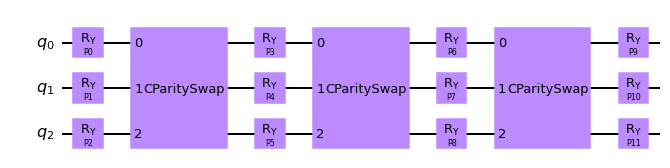

In [3]:
from src.utils.custom_gates import CParitySwap, VSwap
from qiskit.circuit.library.standard_gates import CCXGate
basis = CircuitTemplate(n_qubits=3, base_gates=[CParitySwap()], edge_params=[[(0, 1,2)]])
basis.build(3)
basis.circuit.draw(output='mpl')

In [8]:
import numpy as np
import pylab

from qiskit import Aer
from qiskit.opflow import X, Z, I
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP
from qiskit.circuit.library import TwoLocal

In [17]:
#this is a dumb start, but lets just modify the Hamiltonian triviailly and add a qubit to our ansatz to start looking at 3Q VQE cases
# I was looking at the Qiskit documentation, where the don't go into any detai on hwo to generalize the Hamiltonian to larger system sizes,
# except in the one tutorial, it is not explained and it has been deprecated

In [9]:
H2_op = (-1.052373245772859 * I ^ I) + \
        (0.39793742484318045 * I ^ Z) + \
        (-0.39793742484318045 * Z ^ I) + \
        (-0.01128010425623538 * Z ^ Z) + \
        (0.18093119978423156 * X ^ X)
H3_op = (-1.052373245772859 * I ^ I^I) + \
        (0.39793742484318045 * I ^ Z^I) + \
        (-0.39793742484318045 * Z ^ I^I) + \
        (-0.01128010425623538 * Z ^ Z^I) + \
        (0.18093119978423156 * X ^ X^I)


Optimization complete      


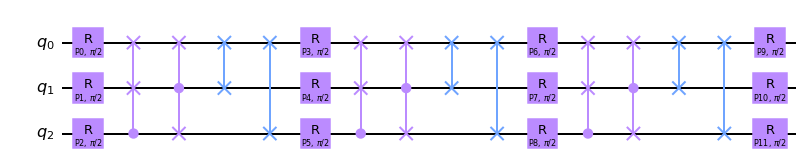

In [19]:
optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=60), SLSQP(maxiter=60)]
converge_cnts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print('\rOptimizer: {}        '.format(type(optimizer).__name__), end='')
    algorithm_globals.random_seed = 50
    ansatz = TwoLocal(num_qubits=3, rotation_blocks='ry', entanglement_blocks='cz')
    ansatz = basis.circuit
    counts = []
    values = []
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
  
    vqe = VQE(ansatz, optimizer, callback=store_intermediate_result,
              quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
    result = vqe.compute_minimum_eigenvalue(operator=H3_op)
    converge_cnts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
print('\rOptimization complete      ');

ansatz.decompose().draw(output='mpl')

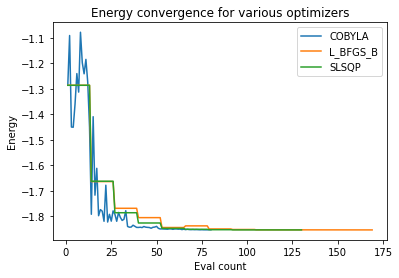

In [20]:
pylab.rcParams['figure.figsize'] = (6, 4)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_cnts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel('Eval count')
pylab.ylabel('Energy')
pylab.title('Energy convergence for various optimizers')
pylab.legend(loc='upper right');

In [13]:
#need to convert VSwap into a gate with known definitions
from webbrowser import Opera
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator
qc = QuantumCircuit(3)
cgate = Operator(VSwap())
# qc.unitary(cgate, [0,1,2])
# new_circuit = transpile(qc, basis_gates=['cx', 'u','swap'])
# vgate = Operator(new_circuit)

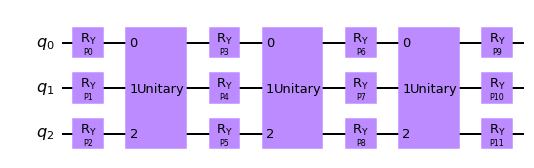

In [20]:
basis = CircuitTemplate(n_qubits=3, base_gates=[cgate], edge_params=[[(0, 1,2)]])
basis.build(3)
basis.circuit.draw(output='mpl')

Optimization complete      


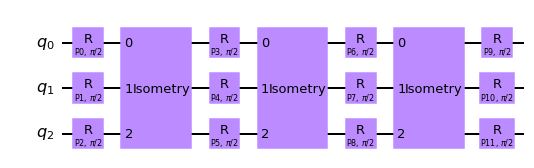

In [21]:
optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=60), SLSQP(maxiter=60)]
converge_cnts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print('\rOptimizer: {}        '.format(type(optimizer).__name__), end='')
    algorithm_globals.random_seed = 50
    ansatz = TwoLocal(num_qubits=3, rotation_blocks='ry', entanglement_blocks='cz')
    ansatz = basis.circuit
    counts = []
    values = []
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
  
    vqe = VQE(ansatz, optimizer, callback=store_intermediate_result,
              quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
    result = vqe.compute_minimum_eigenvalue(operator=H3_op)
    converge_cnts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
print('\rOptimization complete      ');

ansatz.decompose().draw(output='mpl')

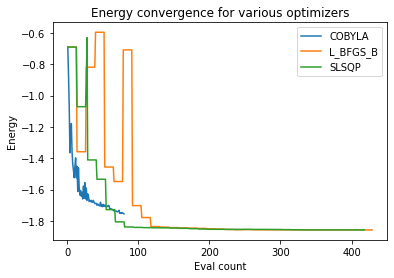

In [22]:
pylab.rcParams['figure.figsize'] = (6, 4)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_cnts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel('Eval count')
pylab.ylabel('Energy') 
pylab.title('Energy convergence for various optimizers')
pylab.legend(loc='upper right');

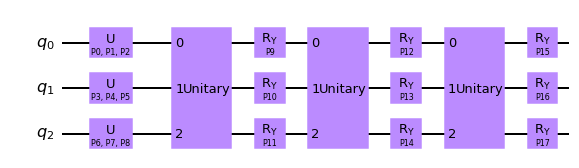

In [26]:
basis = CircuitTemplate(n_qubits=3, base_gates=[cgate], edge_params=[[(0, 1,2)]])
basis.build(3)
basis.circuit.draw(output='mpl')

Optimization complete      


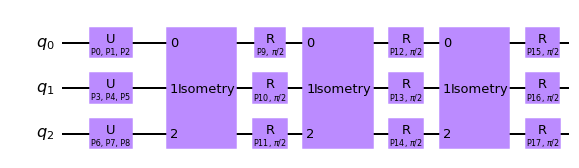

In [27]:
optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=60), SLSQP(maxiter=60)]
converge_cnts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print('\rOptimizer: {}        '.format(type(optimizer).__name__), end='')
    algorithm_globals.random_seed = 50
    ansatz = TwoLocal(num_qubits=3, rotation_blocks='ry', entanglement_blocks='cz')
    ansatz = basis.circuit
    counts = []
    values = []
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
  
    vqe = VQE(ansatz, optimizer, callback=store_intermediate_result,
              quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
    result = vqe.compute_minimum_eigenvalue(operator=H3_op)
    converge_cnts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
print('\rOptimization complete      ');

ansatz.decompose().draw(output='mpl')

Optimization complete      


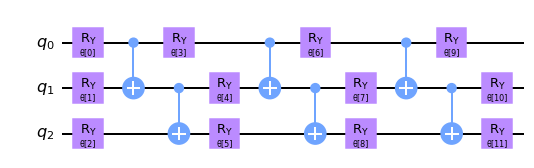

In [17]:
optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=60), SLSQP(maxiter=60)]
converge_cnts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print('\rOptimizer: {}        '.format(type(optimizer).__name__), end='')
    algorithm_globals.random_seed = 50
    ansatz = TwoLocal(num_qubits=3, rotation_blocks='ry', entanglement_blocks='cx', entanglement='linear')
    #ansatz = basis.circuit
    counts = []
    values = []
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
  
    vqe = VQE(ansatz, optimizer, callback=store_intermediate_result,
              quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
    result = vqe.compute_minimum_eigenvalue(operator=H3_op)
    converge_cnts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
print('\rOptimization complete      ');

ansatz.decompose().draw(output='mpl')

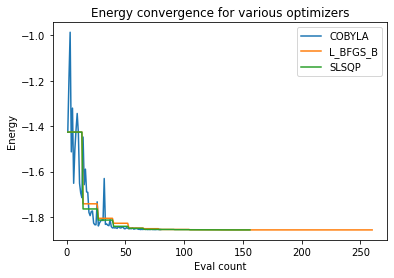

In [22]:
pylab.rcParams['figure.figsize'] = (6, 4)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_cnts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel('Eval count')
pylab.ylabel('Energy')
pylab.title('Energy convergence for various optimizers')
pylab.legend(loc='upper right');

Optimization complete      


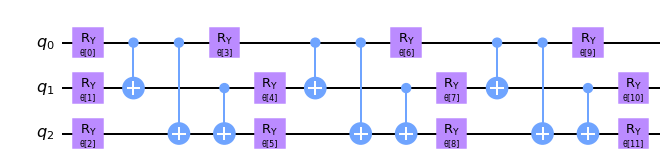

In [23]:
optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=60), SLSQP(maxiter=60)]
converge_cnts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print('\rOptimizer: {}        '.format(type(optimizer).__name__), end='')
    algorithm_globals.random_seed = 50
    ansatz = TwoLocal(num_qubits=3, rotation_blocks='ry', entanglement_blocks='cx', entanglement='full')
    #ansatz = basis.circuit
    counts = []
    values = []
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
  
    vqe = VQE(ansatz, optimizer, callback=store_intermediate_result,
              quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
    result = vqe.compute_minimum_eigenvalue(operator=H3_op)
    converge_cnts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)
print('\rOptimization complete      ');

ansatz.decompose().draw(output='mpl')

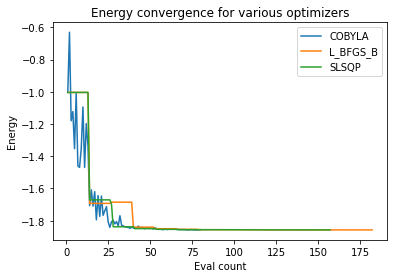

In [24]:
pylab.rcParams['figure.figsize'] = (6, 4)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_cnts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel('Eval count')
pylab.ylabel('Energy')
pylab.title('Energy convergence for various optimizers')
pylab.legend(loc='upper right');

In [26]:
npme = NumPyMinimumEigensolver()
result = npme.compute_minimum_eigenvalue(operator=H2_op)
ref_value = result.eigenvalue.real
print(f'Reference value: {ref_value:.5f}')

Reference value: -1.85728


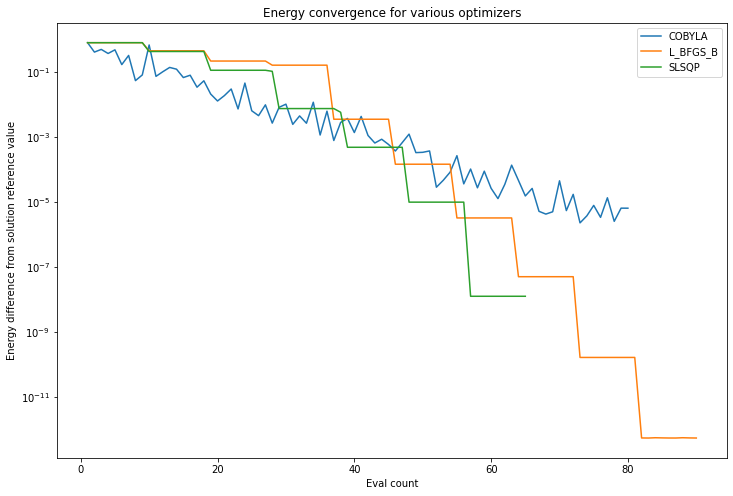

In [7]:
pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_cnts[i], abs(ref_value - converge_vals[i]), label=type(optimizer).__name__)
pylab.xlabel('Eval count')
pylab.ylabel('Energy difference from solution reference value')
pylab.title('Energy convergence for various optimizers')
pylab.yscale('log')
pylab.legend(loc='upper right');

In [8]:
from qiskit.opflow.gradients import Gradient

algorithm_globals.random_seed = 50
ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')

optimizer = SLSQP(maxiter=60)

counts = []
values = []
def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

vqe = VQE(ansatz, optimizer, callback=store_intermediate_result,
          gradient=Gradient(grad_method='fin_diff'),
          quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'Value using Gradient: {result.eigenvalue.real:.5f}')


Value using Gradient: -1.07393


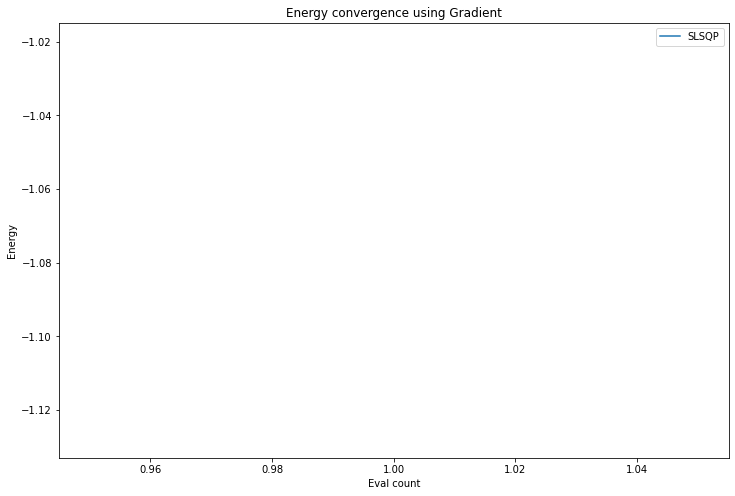

In [9]:
pylab.rcParams['figure.figsize'] = (12, 8)
pylab.plot(counts, values, label=type(optimizer).__name__)
pylab.xlabel('Eval count')
pylab.ylabel('Energy')
pylab.title('Energy convergence using Gradient')
pylab.legend(loc='upper right');

=============Linear Entanglement:=============


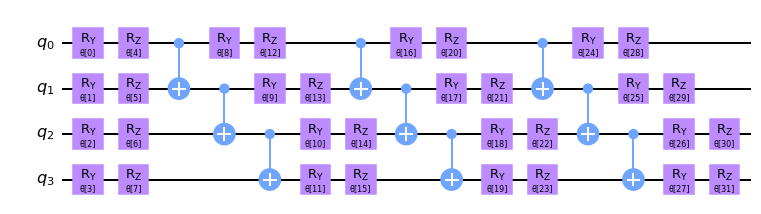


=============Full Entanglement:=============


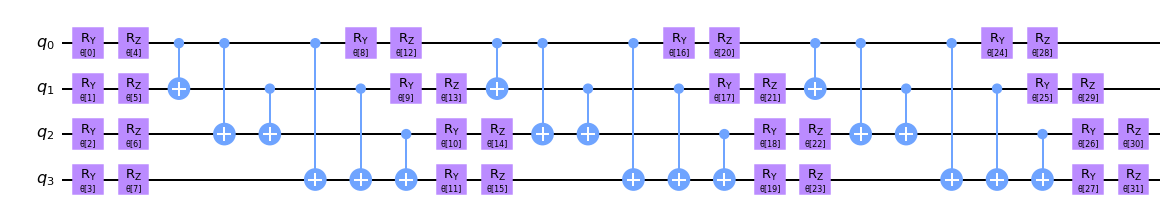

In [10]:
from qiskit.circuit.library import EfficientSU2
entanglements = ["linear", "full"]
for entanglement in entanglements:
    form = EfficientSU2(num_qubits=4, entanglement=entanglement)
    if entanglement == "linear":
        print("=============Linear Entanglement:=============")
    else:
        print("=============Full Entanglement:=============")
    # We initialize all parameters to 0 for this demonstration
    display(form.decompose().draw(output='mpl',fold=100))
    print()